In [122]:
import tensorflow as tf
import deepchem as dc
import numpy as np
graph_featurizer = dc.feat.graph_features.ConvMolFeaturizer()
loader = dc.data.data_loader.CSVLoader( tasks=['measured log solubility in mols per litre'], smiles_field="smiles", featurizer=graph_featurizer )
dataset = loader.featurize( './delaney-processed.csv' )
 
splitter = dc.splits.splitters.RandomSplitter()
trainset,testset = splitter.train_test_split( dataset )     # default is 80% training, 20% testing

Loading raw samples now.
shard_size: 8192
About to start loading CSV from ./delaney-processed.csv
Loading shard 1 of size 8192.
Featurizing sample 0
Featurizing sample 1000
TIMING: featurizing shard 0 took 1.265 s
TIMING: dataset construction took 1.444 s
Loading dataset from disk.
TIMING: dataset construction took 0.208 s
Loading dataset from disk.
TIMING: dataset construction took 0.111 s
Loading dataset from disk.


In [117]:
from deepchem.models.tensorgraph.models.graph_models import GraphConvModel

scores = [];
epochs = [];
for epoch in range(10):
        model = GraphConvModel(1, batch_size=5, mode='regression',tensorboard=True)
# Set nb_epoch=10 for better results.
        model.fit(trainset, nb_epoch=1+epoch*5)
        rmetric = dc.metrics.Metric(dc.metrics.r2_score)
        predict = model.predict(testset)
        print('Epoch: ', 1+epoch*5)
        print('This R2 score: ', model.evaluate(testset,[rmetric]))
        scores.append(model.evaluate(testset,[rmetric]))
        epochs.append(1+epoch*5)
        print(' ')

Epoch:  1
computed_metrics: [0.47970535027116]
This R2 score:  {'r2_score': 0.47970535027116}
computed_metrics: [0.47970535027116]
 
Epoch:  6
computed_metrics: [0.761054975346938]
This R2 score:  {'r2_score': 0.761054975346938}
computed_metrics: [0.761054975346938]
 
Epoch:  11
computed_metrics: [0.8304210877885492]
This R2 score:  {'r2_score': 0.8304210877885492}
computed_metrics: [0.8304210877885492]
 
Epoch:  16
computed_metrics: [0.798892712284254]
This R2 score:  {'r2_score': 0.798892712284254}
computed_metrics: [0.798892712284254]
 
Epoch:  21
computed_metrics: [0.8588241985388656]
This R2 score:  {'r2_score': 0.8588241985388656}
computed_metrics: [0.8588241985388656]
 
Epoch:  26
computed_metrics: [0.8470705173147649]
This R2 score:  {'r2_score': 0.8470705173147649}
computed_metrics: [0.8470705173147649]
 
Epoch:  31
computed_metrics: [0.857354475363709]
This R2 score:  {'r2_score': 0.857354475363709}
computed_metrics: [0.857354475363709]
 
Epoch:  36
computed_metrics: [0.83355

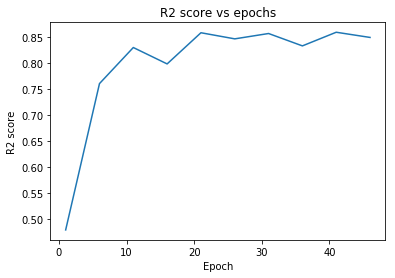

In [118]:
import matplotlib.pyplot as plt
score_values = []
for i in range(10):
    score_values.append(list(scores[i].values())[0])
    
plt.plot(epochs,score_values);
plt.title('R2 score vs epochs');
plt.xlabel('Epoch');
plt.ylabel('R2 score');

80-20 train test split on sample
Batch size 5


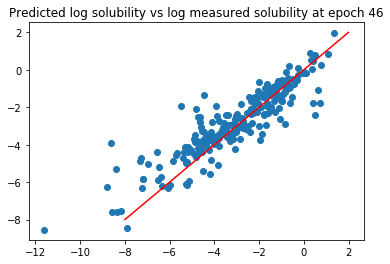

In [150]:
plt.scatter(testset.y,predict)
plt.plot([-8,2],[-8,2],'r')
plt.title('Predicted log solubility vs log measured solubility at epoch ' + str(epochs[-1]));
print('80-20 train test split on sample')
print('Batch size 5')

TIMING: dataset construction took 0.088 s
Loading dataset from disk.
TIMING: dataset construction took 0.158 s
Loading dataset from disk.
Split trainset into  5
computed_metrics: [0.6281102237750582]
This R2 score:  {'r2_score': 0.6281102237750582}
computed_metrics: [0.6281102237750582]
    
TIMING: dataset construction took 0.090 s
Loading dataset from disk.
TIMING: dataset construction took 0.151 s
Loading dataset from disk.
Split trainset into  4
computed_metrics: [0.6246821370786476]
This R2 score:  {'r2_score': 0.6246821370786476}
computed_metrics: [0.6246821370786476]
    
TIMING: dataset construction took 0.100 s
Loading dataset from disk.
TIMING: dataset construction took 0.139 s
Loading dataset from disk.
Split trainset into  3
computed_metrics: [0.6659613713929686]
This R2 score:  {'r2_score': 0.6659613713929686}
computed_metrics: [0.6659613713929686]
    
TIMING: dataset construction took 0.119 s
Loading dataset from disk.
TIMING: dataset construction took 0.122 s
Loading da

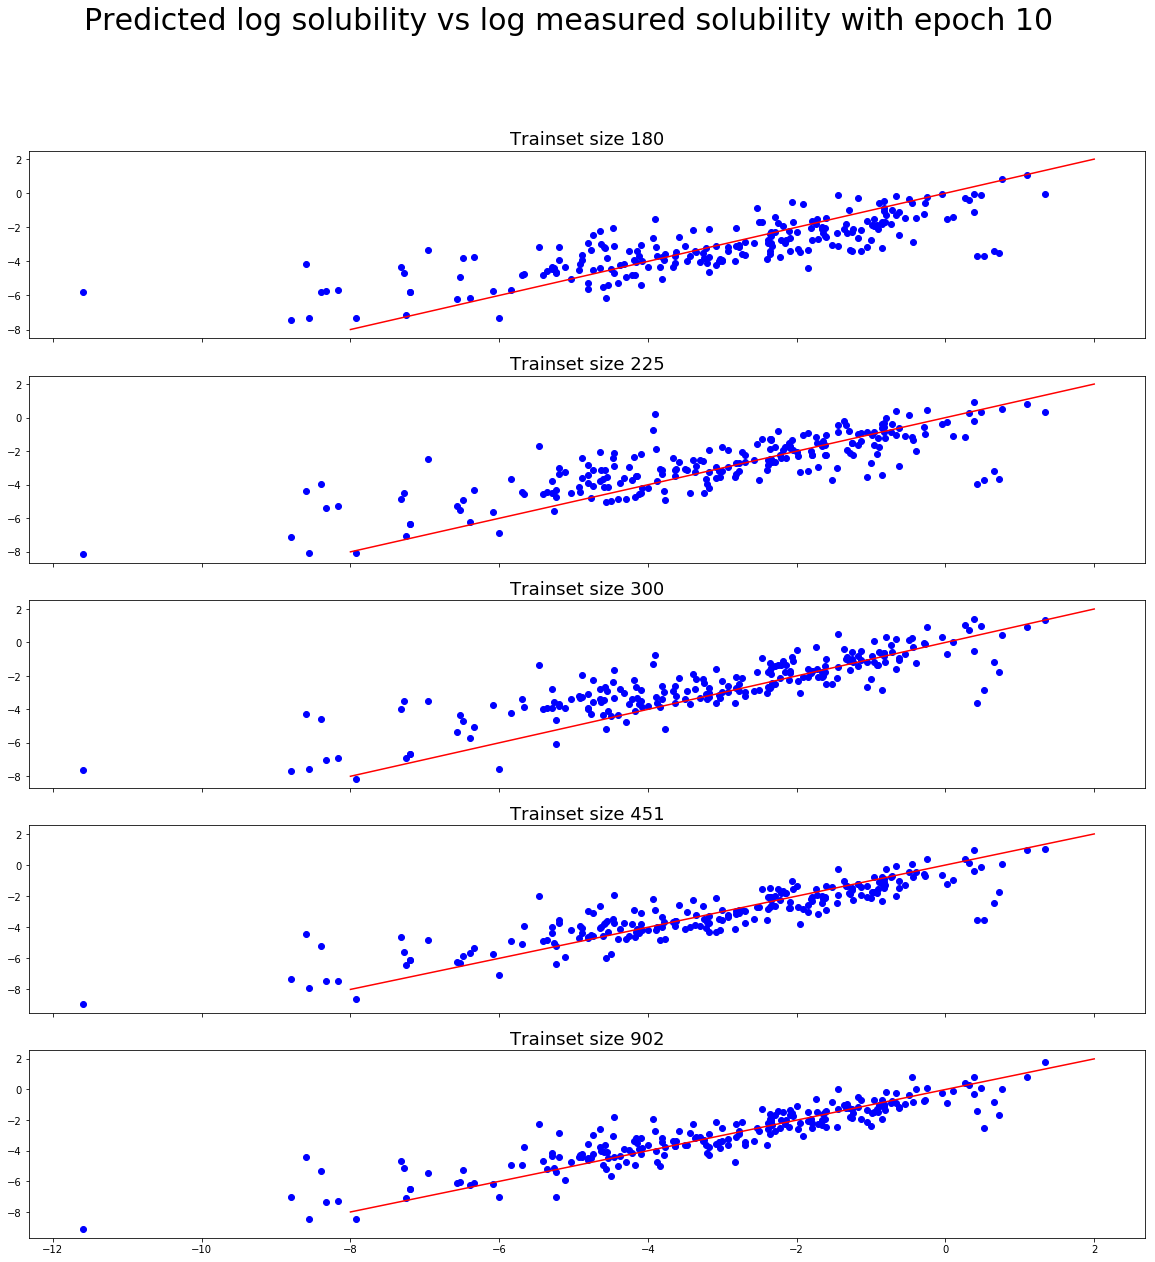

In [157]:
from deepchem.models.tensorgraph.models.graph_models import GraphConvModel

#splitter = dc.splits.splitters.RandomSplitter()
#trainset,testset = splitter.train_test_split( dataset )     # default is 80% training, 20% testing

model = GraphConvModel(1, batch_size=5, mode='regression',tensorboard=True)
cv_scores = []
split = []

fig,axs = plt.subplots(5,sharex=True,figsize = (20,20))
fig.suptitle('Predicted log solubility vs log measured solubility with epoch 10',fontsize=30)
for i in range(5):
    splitdatas, thoraway = splitter.train_test_split( trainset,frac_train=1/(5-i) )
    print('Split trainset into ', 5-i)
    split.append(int(len(trainset.y)/(5-i)))
    
    model.fit(splitdatas, nb_epoch=10)          # fitting the model over the training set (small to large)
    rmetric = dc.metrics.Metric(dc.metrics.r2_score)
    print('This R2 score: ', model.evaluate(testset,[rmetric]))
    cv_scores.append(list(model.evaluate(testset,[rmetric]).values())[0])
    predict = model.predict(testset)               # predict over the test set split originally
    
    axs[i].scatter(testset.y,predict,color ='b')
    axs[i].plot([-8,2],[-8,2],'r')
    axs[i].set_title('Trainset size ' + str(int(len(trainset.y)/(5-i))),fontsize = 18);
    print('    ')

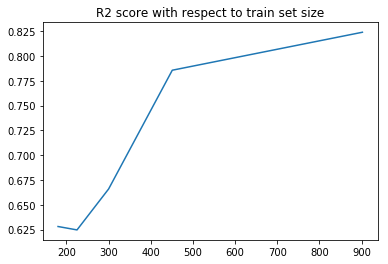

In [158]:
plt.plot(split[::-1],cv_scores[::-1]);
plt.title('R2 score with respect to train set size');